
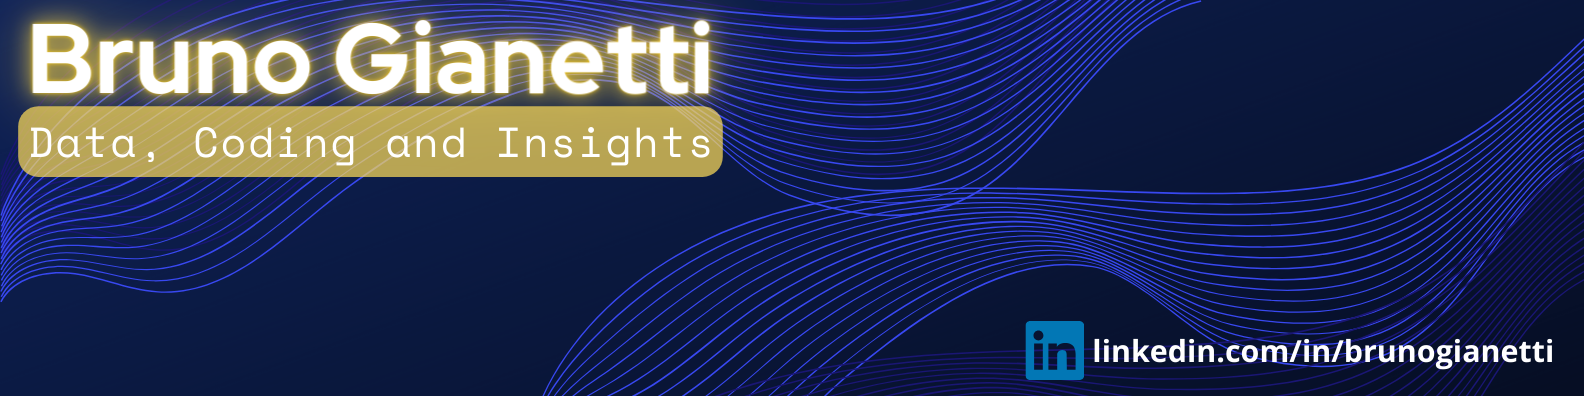


#Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

#Preparando dados

In [2]:
# tabelas de banco de dados que serão utilizados para análise

url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

#Alocando as tabelas no SQLite

In [3]:
#criação da engine
engine = create_engine('sqlite:///:memory:')

In [4]:
#alocação das produtos
produtos.to_sql('produtos', engine, index=False)

205

In [5]:
#alocação das pedidos
pedidos.to_sql('pedidos', engine, index=False)

24527

In [6]:
#alocação das itens pedidos
itens_pedidos.to_sql('itens_pedidos', engine, index=False)

24527

In [7]:
#alocação das vendedores
vendedores.to_sql('vendedores', engine, index=False)

5

In [8]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


##Primeiras Consultas

In [9]:
query = 'SELECT CONDICAO FROM PRODUTOS'

In [10]:
def sql_df():
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
  return pd.DataFrame(dados, columns=consulta.keys())

sql_df()

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [11]:
query = '''SELECT CONDICAO, COUNT(*) AS 'Quantidade'
FROM PRODUTOS
GROUP BY CONDICAO;'''

def sql_df(query):
  with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
  return pd.DataFrame(dados, columns=consulta.keys())

df_produtos = sql_df(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


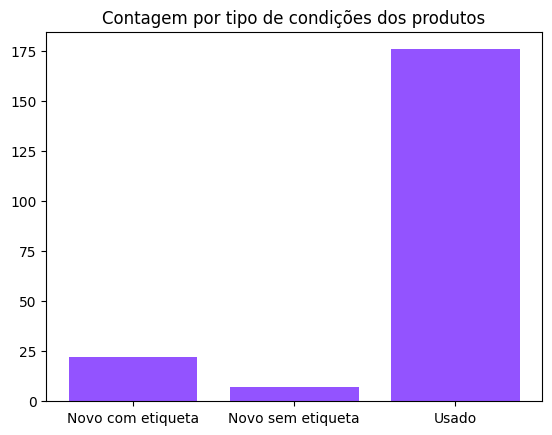

In [12]:
plt.bar(df_produtos['Condicao'], df_produtos['Quantidade'], color='#9353FF')
plt.title('Contagem por tipo de condições dos produtos')
plt.show()

In [13]:
sql_df('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [14]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [15]:
query = '''SELECT PRODUTOS.PRODUTO, SUM(ITENS_PEDIDOS.QUANTIDADE) AS Quantidade
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY Quantidade ASC'''

df_prod_quant = sql_df(query)
df_prod_quant

# Eu poderia usar a cláusula LIMIT para limitar a quantidade de linhas que aparecerá
# na consulta. Ainda poderia utilizar, em conjunto com esta cláusula, outra: OFFSET.
# Esse estabelece um range nos dados.
# Ex: LIMIT 5 OFFSET 5
# A linha acima retornará 5 registros iniciando pelo 6º.

,produto,Quantidade
0,Vestido Malha Estampa,318
1,Blusa Listrada Malha,322
2,Blusa Malha Azul,325
3,Blusa Babados Off-white,337
4,Blusa Cinza,341
...,...,...
196,Saia Midi Cinto,549
197,Calca Alfaiataria Preta,750
198,Saia Pregas Preta,751
199,Calca Jeans Costuras,755


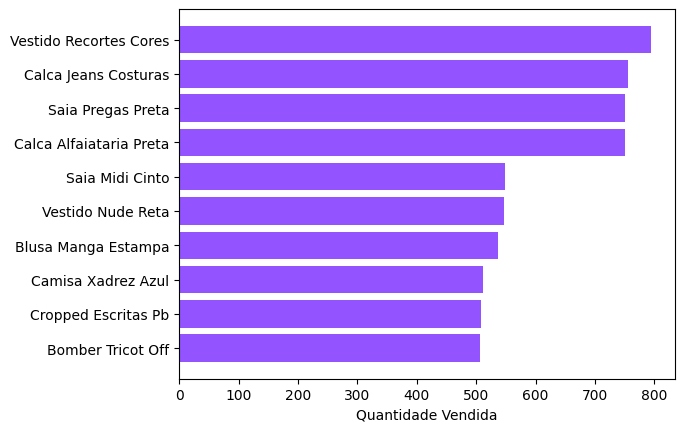

In [16]:
plt.barh(df_prod_quant['produto'][-10:], df_prod_quant['Quantidade'][-10:], color='#9353FF')
plt.xlabel('Quantidade Vendida')
plt.show()

#Filtros

In [17]:
sql_df('SELECT * FROM PEDIDOS').head(3)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [18]:
sql_df('SELECT * FROM PEDIDOS').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


In [19]:
query = ''' SELECT VENDEDOR_ID, COUNT(*) AS 'vendas acumuladas por vendedores'
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY VENDEDOR_ID;
 '''

sql_df(query)

,vendedor_id,vendas acumuladas por vendedores
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


## Melhores vendedores que devem ser bonificados.

In [20]:
query = ''' SELECT VENDEDORES.NOME_VENDEDOR, COUNT(PEDIDOS.PEDIDO_ID) AS 'Quantidade Vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y', data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY COUNT(PEDIDOS.PEDIDO_ID) DESC;
 '''

sql_df(query)

,nome_vendedor,Quantidade Vendas
0,Ana Duarte,3427
1,Daniel Siqueira,3338
2,Nadia Oliveira,2782
3,Millena Pereira,2510
4,Paulo Calanca,2488


## Média de Vendas Por Vendedor

In [21]:
query = ''' SELECT VENDEDORES.NOME_VENDEDOR, ROUND(AVG(PEDIDOS.TOTAL), 2) AS 'Valor Médio por Vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y', data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY ROUND(AVG(PEDIDOS.TOTAL), 2) DESC;
 '''

sql_df(query)

,nome_vendedor,Valor Médio por Vendas
0,Daniel Siqueira,1972.34
1,Millena Pereira,1894.61
2,Ana Duarte,1843.45
3,Nadia Oliveira,1818.34
4,Paulo Calanca,1813.47


#Comparando Vendas 2019 e Vendas 2020

In [22]:
## Selecionar dados do ano de 2019
query = '''
SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM pedidos
WHERE strftime('%Y', data_compra) = '2019'
GROUP BY mes;
'''
vendas_19 = sql_df(query)

## Selecionar dados do ano de 2020
query = '''
SELECT strftime('%m', data_compra) AS mes, COUNT(*) AS quantidade_vendas
FROM pedidos
WHERE strftime('%Y', data_compra) = '2020'
GROUP BY mes;
'''
vendas_20 = sql_df(query)


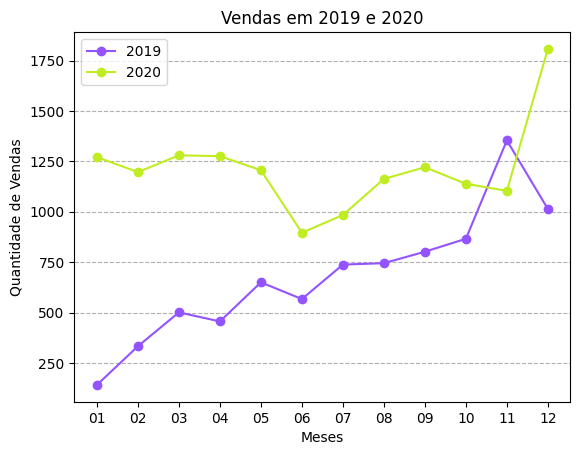

In [23]:
# Plotar o gráfico de 2019 e 2020
plt.plot(vendas_19.mes.to_numpy(), vendas_19.quantidade_vendas.to_numpy(), marker='o', linestyle='-', color='#9353FF', label = '2019')
plt.plot(vendas_20.mes.to_numpy(), vendas_20.quantidade_vendas.to_numpy(), marker='o', linestyle='-', color='#C0ED22', label = '2020')

# Definir título e eixos
plt.title('Vendas em 2019 e 2020')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Vendas')

# Adicionar a legenda
plt.legend()

# Adicionar grid horizontal
plt.grid(axis='y', linestyle='--')

# Exibir a figura
plt.show()


# Ranqueamento de Estados

In [24]:
query = ''' SELECT ESTADO, COUNT(*) AS Pedidos
FROM ITENS_PEDIDOS
GROUP BY ESTADO
ORDER BY Pedidos DESC;
'''

sql_df(query)

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


# Quais vendedores selecionar para o Estado de São Paulo?

In [29]:
query = ''' SELECT PEDIDOS.VENDEDOR_ID, COUNT(*) AS Quantidade_Vendas
FROM PEDIDOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PEDIDOS.VENDEDOR_ID
ORDER BY Quantidade_Vendas DESC;
'''

sql_df(query)

,vendedor_id,Quantidade_Vendas
0,2,190
1,5,182
2,3,181
3,1,180
4,4,157


In [30]:
query = ''' SELECT VENDEDORES.NOME_VENDEDOR, COUNT(*) AS Quantidade_Vendas
FROM PEDIDOS
JOIN VENDEDORES ON VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PEDIDO_ID = PEDIDOS.PEDIDO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY Quantidade_Vendas DESC;
'''

sql_df(query)

,nome_vendedor,Quantidade_Vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157
